<a href="https://colab.research.google.com/github/kavinCodes/ML_portfolio/blob/master/Fitting_Continuous_Equations_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.utils import normalize

Using TensorFlow backend.


### **Defining equations:**


$$f(x)=\sqrt[3]{x}$$
$$f(x)=x^2$$
$$f(x)=ax^2 + bx + c$$
$$f(x)=\frac{1}{1+e^{-x}}$$

In [0]:
def cube_root(x):
  return np.cbrt(x)

def simple_parabola(x):
  return np.square(x)

def complex_parabola(x, a=2, b=-2, c=-4):
  return np.add(a*np.square(x), np.add(b*x, c))

def sigmoid(x):
  return 1/np.add(1, np.exp(-x))

In [0]:
function_list = {'cube_root': cube_root, 
                 'simple_parabola': simple_parabola, 
                 'complex_parabola': complex_parabola, 
                 'sigmoid': sigmoid}

### **Neural network builder class and training functions**

In [0]:
## Creating a Build class to construct different types of models
class build_():
    
  def __init__(self):
    pass
  
  def a_base_model(self):
    temp = Sequential()
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(1, activation=tf.nn.relu))
    return temp
  
  def a_level_1_model(self):
    temp = Sequential()
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(1))
    return temp
 
  def a_level_2_model(self):
    temp = Sequential()
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(64, activation=tf.nn.relu))
    temp.add(Dense(64, activation=tf.nn.relu))
    temp.add(Dense(1))
    return temp
  
## Function to train a model on some data
def equation_training(model, train, labels, epochs=50):
  """Requires at least 3 inputs"""
  model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mse'])
  model.fit(train, labels, epochs=epochs, verbose=0)
  
## Adding polynomial features to a X,Y training set
def add_poly(train, order):
  feat = np.power(train, order)
  return np.concatenate((train, feat), axis=1)

### **Neural network curve fitting function**

In [0]:
def NN_curve_fitting(x, y=None, equation=None, poly=True, return_model=False, 
                     overshoot=5):
  """ This solver takes in an input and output and runs through a neural
  network to predict the function's response.
  
  If 'y' is None, 'equation' must be given
  If 'equation' is given, do not include 'y'
  
  Possible 'equations' are (as defined in function_list):
    'cube_root'
    'simple_parabola'
    'complex_parabola'
    'sigmoid'
    
  
  """
  
  test_x = np.linspace(np.min(x)-overshoot, np.max(x)+overshoot, num=500).reshape(-1,1)
  
  ## create polynomial features for train/test inputs
  if poly:
    orders = [2, 3]
    x_train = add_poly(x, orders)
    x_test = add_poly(test_x, orders)
    pass
  else:
    x_train = x
    x_test = test_x
    pass
      
  ## retrieve 'y' if given
  if y is None:
    y_train = function_list[equation](x).reshape(-1,1)
    y_test = function_list[equation](test_x).reshape(-1,1)
    pass
  else:
    y_train = y
  
  ## build and train NN
  model = build_().a_level_2_model()
  equation_training(model, x_train, y_train)
  
  ## create prediction values to graph
  y_pred = model.predict(x_test)
  
  ## visualize results
  plt.scatter(x, y_train)
  plt.plot(test_x, y_pred, 'r')
  
  if return_model:
    return model
  
  pass
  
  

# **Playground**

In [0]:
## Defining training/test inputs
play_train = np.subtract(10*np.random.rand(1000).reshape(-1,1), 5)

## Defining training labels
play_labels = sigmoid(play_train)


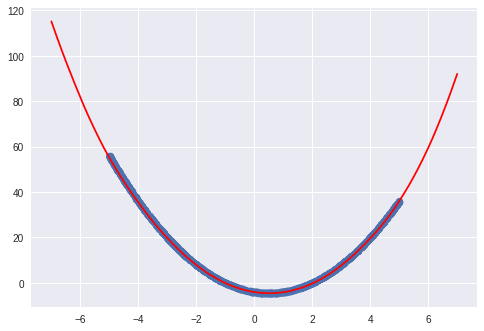

In [29]:
NN_curve_fitting(play_train, equation='complex_parabola', overshoot=2)

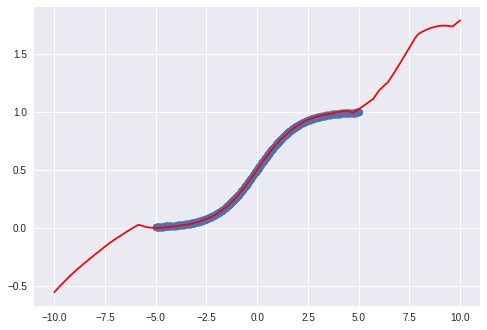

In [30]:
NN_curve_fitting(play_train, play_labels)

1. Can this model work for determining black-body radiation curves w.r.t wavelength while also changing temperature if that's given as another independent variable? What do the resulting weights look like?

2. What about market data?

3. What about solar data?